In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import os

In [4]:
datasource = os.path.abspath('..\Data\pretraitement_service5.csv')
data = pd.read_csv(datasource , delimiter=";")
data.head(10)

,Unnamed: 0,text,label,label_id
0,0,request urgent,urgent,0
1,1,request import,urgent,0
2,2,request realli urgent,urgent,0
3,3,request realli import,urgent,0
4,4,must complet mission now,urgent,0
5,5,must complet mission now,urgent,0
6,6,must complet mission right now,urgent,0
7,7,must complet mission instantli,urgent,0
8,8,must complet mission fast,urgent,0
9,9,must complet mission fast,urgent,0


Text(0.5,1,'Number of urgent and noturgent messages')

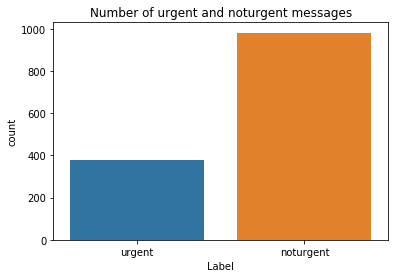

In [3]:
sns.countplot(data.label)
plt.xlabel('Label')
plt.title('Number of urgent and noturgent messages')

In [4]:
X = data.text
Y = data.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
print(Y)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
print(Y_train)
print(X_train)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
891             biggest complaint batteri drain superfast
994                                                 drain
754                                   great product price
1068                       receiv headset good time happi
1170                                    fix phone quickli
1092                     product high qualiti chines crap
244                                           featur want
604     stupid keep bui new charger car charger cradl ...
1302           need wai take much time need get real fast
1269                                            get right
570                 drive along headset start ring reason
681                                            not regret
1150                                              satisfi
679     version bill howev difficult understand even t...
388                                       replac die week
990                internet access fine rare instanc work
825                   not make mista

In [6]:
import os
max_words = 2000
max_len = 25
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
print(sequences)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
print(sequences_matrix)
print('word_index : ',tok.word_index)

[[615, 320, 11, 244, 616], [244], [6, 10, 39], [132, 14, 8, 28, 108], [46, 1, 109], [10, 214, 19, 435, 184], [157, 22], [436, 110, 23, 52, 56, 26, 56, 437, 111, 26, 617, 185, 28, 52, 1, 44], [5, 158, 78, 84, 28, 5, 13, 123, 16], [13, 12], [186, 438, 14, 159, 245, 187], [2, 439], [215], [133, 160, 134, 321, 322, 63, 323, 39, 216, 246], [112, 217, 98], [124, 247, 113, 618, 619, 3], [2, 18, 324, 38, 2, 23, 1], [2, 22], [1, 17, 2, 6, 248, 1, 440, 441, 620, 47, 2, 322, 621, 74], [249, 27, 9, 161, 622, 623, 79, 325, 37, 624], [63, 625, 442, 626, 627, 326, 99, 443, 74], [114, 64, 444, 250, 80], [2, 628, 1, 445], [5, 446, 16, 447, 159], [85, 100, 11, 2, 448, 449, 251, 1], [53], [57, 40, 162, 8, 135], [5, 23, 629, 327], [65], [14, 630, 450, 108, 66], [11, 101, 29], [1, 75, 252, 136, 218, 451, 1], [37, 631, 328, 14], [22, 24, 30], [137, 138, 58], [7, 139, 160, 4], [163, 253, 632, 110, 254, 25], [44, 35, 16, 5, 24, 255], [2, 115, 31, 101, 256, 219], [2, 102, 125], [5, 45, 188, 4], [7, 32, 140, 14

word_index :  {'phone': 1, 'not': 2, 'work': 3, 'now': 4, 'need': 5, 'great': 6, 'must': 7, 'good': 8, 'us': 9, 'product': 10, 'batteri': 11, 'right': 12, 'get': 13, 'headset': 14, 'call': 15, 'fast': 16, 'sound': 17, 'make': 18, 'qualiti': 19, 'immedi': 20, 'on': 21, 'want': 22, 'bui': 23, 'help': 24, 'ear': 25, 'car': 26, 'charg': 27, 'time': 28, 'well': 29, 'instantli': 30, 'would': 31, 'give': 32, 'like': 33, 'complet': 34, 'realli': 35, 'servic': 36, 'excel': 37, 'pleas': 38, 'price': 39, 'case': 40, 'recommend': 41, 'problem': 42, 'ev': 43, 'come': 44, 'repair': 45, 'fix': 46, 'could': 47, 'prepar': 48, 'monei': 49, 'break': 50, 'comfort': 51, 'new': 52, 'wast': 53, 'love': 54, 'fit': 55, 'charger': 56, 'nice': 57, 'hurri': 58, 'look': 59, 'should': 60, 'also': 61, 'easi': 62, 'even': 63, 'better': 64, 'disappoint': 65, 'purchas': 66, 'find': 67, 'dai': 68, 'hospit': 69, 'minut': 70, 'best': 71, 'ever': 72, 'year': 73, 'sai': 74, 'try': 75, 'bad': 76, 'first': 77, 'take': 78, 'ca

In [7]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [8]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 25)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 25, 50)            100000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [9]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 923 samples, validate on 231 samples
Epoch 1/10
923/923 [==============================] - 1s 1ms/step - loss: 0.6485 - acc: 0.6956 - val_loss: 0.5977 - val_acc: 0.6970
Epoch 2/10
923/923 [==============================] - 0s 250us/step - loss: 0.5577 - acc: 0.7237 - val_loss: 0.5583 - val_acc: 0.6970
Epoch 3/10
923/923 [==============================] - 0s 235us/step - loss: 0.4906 - acc: 0.7237 - val_loss: 0.4452 - val_acc: 0.7143
Epoch 4/10
923/923 [==============================] - 0s 232us/step - loss: 0.3674 - acc: 0.8093 - val_loss: 0.3548 - val_acc: 0.7576
Epoch 5/10
923/923 [==============================] - 0s 247us/step - loss: 0.2364 - acc: 0.9220 - val_loss: 0.2706 - val_acc: 0.8788
Epoch 6/10
923/923 [==============================] - 0s 231us/step - loss: 0.1394 - acc: 0.9686 - val_loss: 0.1381 - val_acc: 0.9610
Epoch 7/10
923/923 [==============================] - 0s 227us/step - loss: 0.0699 - acc: 0.9870 - val_loss: 0.1718 - val_acc: 0.9610
Epoch 8/10
923/923

In [10]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
pred = model.predict(test_sequences_matrix)

In [11]:
accr = model.evaluate(test_sequences_matrix,Y_test)

204/204 [==============================] - 0s 113us/step


In [12]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.080
  Accuracy: 0.971


In [16]:
stopword={"until","off","the","any","only","d","in","because","during","on","which","who","re","then","each","will","its","these","but","other","been","t","y","between","she's","she","have","yourselves","ve","ain","i","just","to","that","own","before","himself","themselves","a","is","my","ll","you","where","had","too","haven","won","yours","over","her","his","shan","if","after","under","such","doing","up","through","same","we","as","or","very","no","myself","they","me","your","are","what","against","theirs","ours","and","it's","of","did","once","am","yourself","again","why","above","here","into","them","at","both","s","hers","herself","so","by","from","when","this","that'll","about","him","it","was","you've","ma","there","ourselves","their","m","how","itself","an","with","down","more","can","some","than","our","those","do","most","be","o","were","all","out","for","has","further","while","whom","below","he","few","being"}

In [17]:
def replace_word(text):
    switcher = {
       "couldn't": "could not",
       "couldn": "could not",
       "won't": "will not",
       "won": "will not",
       "mustn't": "must not",
       "mustn": "must not",
       "that'll": "that will",
       "shouldn't": "should not",
       "shouldn": "should not",
       "should've": "should have",
       "haven't": "have not",
       "haven": "have not",
       "hadn't": "have not",
       "hadn": "have not",
       "hasn't": "have not",
       "hasn": "have not",
       "didn't": "do not",
       "didn": "do not",
       "doesn't": "do not",
       "doesn": "do not",
       "don't": "do not",
       "don": "do not",
       "isn't": "be not",
       "you'd":"you would",
       "you've":"you have",
       "you're":"you are",
       "you'll":"you will",
       "she's":"she is",
       "it's":"it is",
       "aren't":"are not",
       "aren":"are not",
       "weren't":"were not",
       "weren":"were not",
       "wouldn't":"would not",
       "wouldn":"would not",
       "needn't":"need not",
       "needn":"need not",
       "wasn't":"was not",
       "wasn":"was not",
       "mightn't":"might not",
       "mightn":"might not",
       "shan't":"shall not",
       "shan":"shall not",
       "can't":"can not",
       "i'm":"i am"
   }
    text = text.lower()
    text = text.split()
    for i in range(len(text)):
        text[i] = switcher.get(text[i], text[i])
    text = " ".join(text)
    return text

In [37]:
import nltk
nltk.download('stopwords')
def transformText(text):
    
    #text=split_alphanum(text)
    #stops = set(stopwords.words("english"))
    
    # Convert text to lower
    text = text.lower()
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    
    #replace_word
    text=replace_word(text)
    input_str=word_tokenize(text)
    for i in range(len(input_str)):
        input_str[i]=lemmatizer.lemmatize(input_str[i],pos='v')
        input_str[i]=lemmatizer.lemmatize(input_str[i],pos='n')
    
    text=" ".join(input_str)
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    
     #correcteur
    spell = SpellChecker()
    misspelled = text.split()
    for i in range(len(misspelled)):
# Get the one `most likely` answer
      word = spell.correction(misspelled[i])
      misspelled[i]=word
    text = " ".join(misspelled)
    
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in stopword]
    
   
    
    # Removing all the tokens with lesser than 3 characters
    filtered_words = gensim.corpora.textcorpus.remove_short(filtered_words, minsize=3)
    
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    
   
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    
    
    #Lematisation
    #text = [WordNetLemmatizer().lemmatize(word) for word in text.split()]
    
    
    # Stemming
    return gensim.parsing.preprocessing.stem_text(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khouloud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import nltk                       # the natural langauage toolkit, open-source NLP
nltk.download('wordnet')
import pandas as pd               # pandas dataframe
import re                         # regular expression
from nltk.corpus import stopwords  
from gensim import parsing        # Help in preprocessing the data, very efficiently
import gensim
import numpy as np
from spellchecker import SpellChecker
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.parsing.preprocessing import split_alphanum
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khouloud\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\khouloud\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [45]:
t=transformText('i need my phone now ')
text = np.array([t])
sequences = tok.texts_to_sequences(text)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
prediction = model.predict(sequences_matrix)
predict=np.argmax(prediction,axis=1)
print(sequences_matrix)
print(sequences)
print(prediction)
print(predict[0])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 1 4]]
[[5, 1, 4]]
[[0.99386495]]
0
